## Classification
- Step 0: Training-validation data split
- Step 1: Data analysis
- **Step 2: Classification**
	- Fitting classifiers on Training data set
	- Performance comparison (CV and Validation I data set)
	- Model selection and stacking
- Step 3: Model Validation

In [1]:
%matplotlib inline
# %matplotlib qt

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import modules.utilgen as utgen
import modules.model_framework.utilmodel as utmdl
import modules.model_framework.model as mdl
import modules.data_framework.data_pipeline as dtp
import itertools

% reload_ext autoreload
% autoreload 2


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
np.random.seed(42)
sns.set_style("whitegrid")

### Load the data
#### Load the testing and validation I data sets

In [3]:
dataPath = os.path.join('data', 'data_derived', 'train1.csv')
dataTPath = os.path.join('data', 'data_derived', 'train2.csv')
dataOr = pd.read_csv(dataPath, index_col=0)
dataTOr = pd.read_csv(dataTPath, index_col=0)
with utgen.printOptions(precision=2):
    print('---------- Original Data (Train) -----------')
    display(dataOr.sample(n=5))
    display(dataOr.describe())
    print('---------- Original Data (Test) -----------')
    display(dataTOr.sample(n=5))
    display(dataTOr.describe())

---------- Original Data (Train) -----------

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.27,D20,C
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.00,NaN,S
22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.00,D56,S
250,0,2,"Carter, Rev. Ernest Courtenay",male,54.00,1,0,244252,26.00,NaN,S
593,0,3,"Elsbury, Mr. William James",male,47.00,0,0,A/5 3902,7.25,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.00,623.00,505.00,623.00,623.00,623.00
mean,0.40,2.31,29.27,0.53,0.37,31.79
std,0.49,0.83,14.07,1.06,0.79,46.40
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.90
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,30.70
max,1.00,3.00,80.00,8.00,5.00,512.33


---------- Original Data (Test) -----------

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
389,0,3,"Sadlier, Mr. Matthew",male,nan,0,0,367655,7.73,NaN,Q
483,0,3,"Rouse, Mr. Richard Henry",male,50.00,0,0,A/5 3594,8.05,NaN,S
65,0,1,"Stewart, Mr. Albert A",male,nan,0,0,PC 17605,27.72,NaN,C
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.00,0,0,17465,25.93,D17,S
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.00,0,0,248747,13.00,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,268.00,268.00,209.00,268.00,268.00,268.00
mean,0.34,2.31,30.75,0.51,0.40,33.16
std,0.47,0.85,15.56,1.20,0.85,56.70
min,0.00,1.00,0.92,0.00,0.00,0.00
25%,0.00,1.75,21.00,0.00,0.00,7.92
50%,0.00,3.00,29.00,0.00,0.00,14.48
75%,1.00,3.00,39.00,1.00,0.00,33.63
max,1.00,3.00,74.00,8.00,6.00,512.33


#### Clean and transform the data (example)

In [4]:
version = 7
with utgen.printOptions(precision=2):
    data, dataT = dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)
    print('---------- Clean Data (Train) -----------')
    display(data.sample(n=5))
    display(data.describe())
    print(data.dtypes)
    print('---------- Clean Data (Test) -----------')
    display(dataT.sample(n=5))
    display(dataT.describe())
    print(dataT.dtypes)


-- Data pipeline v. 7 --

---------- Clean Data (Train) -----------

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
PassengerId,,,,,,,,,,,,,,
759,0,3,34.00,0,0,8.05,0,1,0,1,0,0,0,0
265,0,3,22.28,0,0,7.75,0,0,1,1,1,0,1,0
77,0,3,28.68,0,0,7.90,0,1,0,1,1,0,0,0
444,1,2,28.00,0,0,13.00,0,1,1,1,0,0,0,1
632,0,3,51.00,0,0,7.05,0,1,0,1,0,0,0,0


,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
count,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00
mean,0.40,2.31,29.13,0.42,0.36,29.62,0.20,0.72,0.38,0.77,0.19,0.05,0.22,0.03
std,0.49,0.83,13.16,0.64,0.71,35.39,0.40,0.45,0.48,0.42,0.39,0.21,0.41,0.16
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,22.00,0.00,0.00,7.90,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,28.83,0.00,0.00,14.45,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,1.00,3.00,36.00,1.00,0.00,30.70,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
max,1.00,3.00,71.58,2.00,3.00,163.53,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
EmbarkedC        uint8
EmbarkedS        uint8
Female           uint8
CabinNan         uint8
AgeNan           uint8
TitleMaster      uint8
TitleMiss        uint8
TitleRare        uint8
dtype: object

---------- Clean Data (Test) -----------

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
PassengerId,,,,,,,,,,,,,,
568,0,3,29.00,0,3,21.07,0,1,1,1,0,0,0,0
160,0,3,4.63,2,2,69.55,0,1,0,1,1,1,0,0
569,0,3,29.14,0,0,7.23,1,0,0,1,1,0,0,0
109,0,3,38.00,0,0,7.90,0,1,0,1,0,0,0,0
455,0,3,28.83,0,0,8.05,0,1,0,1,1,0,0,0


,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.34,2.31,30.49,0.37,0.37,29.57,0.16,0.74,0.30,0.76,0.22,0.04,0.19,0.03
std,0.47,0.85,14.28,0.64,0.73,35.52,0.36,0.44,0.46,0.42,0.42,0.20,0.39,0.16
min,0.00,1.00,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.75,22.00,0.00,0.00,7.92,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,29.00,0.00,0.00,14.48,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,1.00,3.00,38.00,1.00,0.00,33.63,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
max,1.00,3.00,71.58,2.00,3.00,163.53,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
EmbarkedC        uint8
EmbarkedS        uint8
Female           uint8
CabinNan         uint8
AgeNan           uint8
TitleMaster      uint8
TitleMiss        uint8
TitleRare        uint8
dtype: object

###Logistic

In [5]:
# import cProfile
# cProfile.run('modelLR.fit(data)')

-- Data pipeline v. 7 --

****** LOGISTIC ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.82 (0.03) / 0.84

accproba	 (IS / CV / OOS): 0.74 / 0.73 (0.02) / 0.73

logproba	 (IS / CV / OOS): -0.41 / -0.44 (0.03) / -0.43

aucproba	 (IS / CV / OOS): 0.88 / 0.87 (0.01) / 0.84

recall	 (IS / CV / OOS): 0.79 / 0.77 (0.03) / 0.72

precision	 (IS / CV / OOS): 0.80 / 0.79 (0.05) / 0.77

-----Confusion (IS)-----

   0-pred  1-pred
0    0.51    0.08
1    0.09    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.09    0.24

-----Coefficients-----

Pclass        -0.92
Age           -0.45
SibSp         -0.38
Parch         -0.19
Fare          -0.17
EmbarkedC     -0.83
EmbarkedS     -1.34
Female         3.66
CabinNan      -0.87
AgeNan        -0.25
TitleMaster    2.86
TitleMiss     -0.95
TitleRare     -0.02
dtype: float64

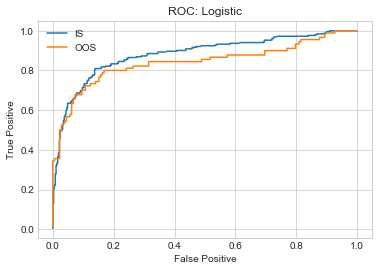

In [6]:
data, dataT = dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=7)
modelLR = mdl.Logistic(scale='some', fit_intercept=False, C=1000)
modelLR.fit(data)
modelLR.predict(dataT)
modelLR.printPlotSummary()

###Logistic Ridge

-- Data pipeline v. 7 --

****** LOGISTIC RIDGE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.81 / 0.80 (0.03) / 0.81

accproba	 (IS / CV / OOS): 0.72 / 0.71 (0.02) / 0.71

logproba	 (IS / CV / OOS): -0.43 / -0.46 (0.04) / -0.44

aucproba	 (IS / CV / OOS): 0.88 / 0.87 (0.01) / 0.85

recall	 (IS / CV / OOS): 0.83 / 0.82 (0.03) / 0.78

precision	 (IS / CV / OOS): 0.73 / 0.72 (0.04) / 0.70

-----Confusion (IS)-----

   0-pred  1-pred
0    0.47    0.12
1    0.07    0.34

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.55    0.11
1    0.07    0.26

-----Coefficients-----

Pclass        -0.82
Age           -0.40
SibSp         -0.42
Parch         -0.26
Fare          -0.02
EmbarkedC     -0.09
EmbarkedS     -0.32
Female         1.85
CabinNan      -0.28
AgeNan        -0.04
TitleMaster    0.62
TitleMiss     -0.41
TitleRare     -0.00
dtype: float64

-----Ridge CV multiplier-----

Ridge Multiplier (inverse reg. strength) = 4.00

D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


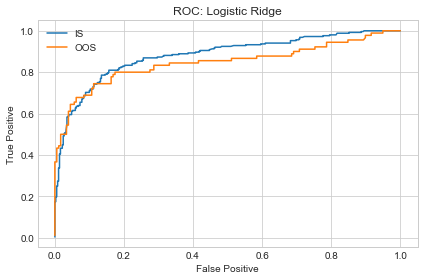

In [7]:
data, dataT = dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=7)
modelLRRidgeCV = mdl.LogisticRidgeCV(fit_intercept=False, scale=True, Cs=np.exp2(np.arange(-7, 8, 1)))
modelLRRidgeCV.fit(data)
modelLRRidgeCV.predict(dataT)
modelLRRidgeCV.printPlotSummary()

###Logistic Best Subset

****** LOGISTIC KBEST ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.77 / 0.78 (0.03) / 0.75

accproba	 (IS / CV / OOS): 0.68 / 0.68 (0.02) / 0.68

logproba	 (IS / CV / OOS): -0.48 / -0.49 (0.05) / -0.49

aucproba	 (IS / CV / OOS): 0.84 / 0.84 (0.04) / 0.81

recall	 (IS / CV / OOS): 0.80 / 0.80 (0.04) / 0.78

precision	 (IS / CV / OOS): 0.69 / 0.70 (0.05) / 0.60

-----Confusion (IS)-----

   0-pred  1-pred
0    0.45    0.15
1    0.08    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.49    0.17
1    0.07    0.26

-----Coefficients-----

Pclass      -0.59
Fare        -0.09
Female       1.36
CabinNan    -0.33
TitleMiss   -0.10
dtype: float64

D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


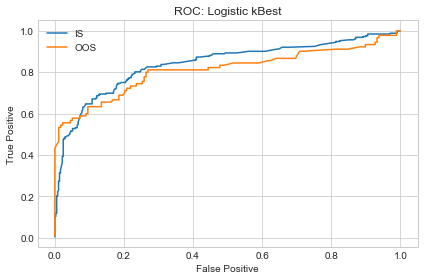

In [8]:
modelLRBestK = mdl.LogisticBestSubset(fit_intercept=False, scale=True, k=5)
modelLRBestK.fit(data)
modelLRBestK.predict(dataT)
modelLRBestK.printPlotSummary()

###Logistic GAM

In [37]:
modelGAM = mdl.LogisticGAM(scale=True, fit_intercept=False, n_splines=15, lam=5)
modelGAM.fit(data)
modelGAM.predict(dataT)
modelGAM.printPlotSummary()

****** LOGISTIC GAM ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.81 / 0.79 (0.03) / 0.79

accproba	 (IS / CV / OOS): 0.73 / 0.72 (0.02) / 0.73

logproba	 (IS / CV / OOS): -0.43 / -0.46 (0.06) / -0.44

aucproba	 (IS / CV / OOS): 0.86 / 0.85 (0.02) / 0.86

recall	 (IS / CV / OOS): 0.69 / 0.71 (0.08) / 0.72

precision	 (IS / CV / OOS): 0.77 / 0.74 (0.09) / 0.75

-----Confusion (IS)-----

   0-pred  1-pred
0    0.55    0.08
1    0.12    0.26

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.50    0.10
1    0.11    0.29

-----Statistics-----

Feature Function   Data Type      Num Splines   Spline Order  Linear Fit  Lambda     P > x      Sig. Code 
================== ============== ============= ============= =========== ========== ========== ==========
Pclass_________    numerical      15            3             False       5.0        3.27e-03   **        
Age____________    numerical      15            3             False       5.0        1.21e-03   **        
SibSp__________    numerical      15            3             False       5.0        9.70e-02   .         
Parch__________    numerical      15            3             False       5.0        3.68e-01             
Fare___________    numerical      15            3             False       5.0        2.40e-02   *         
EmbarkedC______    numerical      15            3             False       5.0        9.69e-01             
EmbarkedS______    numerical      15            3             False       5.0        6.97e-01             
Female_________    numerical      15 

Significance codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

###Logistic Local (Linear proxy)

In [25]:
modelLocal = mdl.LogisticLinearLocal(scale=True, reg_type='ll', bw=1.)
modelLocal.fit(data)
modelLocal.predict(dataT)
modelLocal.printPlotSummary()


****** LOGISTIC LOCAL (LINEAR PROXY) ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.88 / 0.81 (0.04) / 0.82

accproba	 (IS / CV / OOS): 0.64 / 0.61 (0.01) / 0.62

logproba	 (IS / CV / OOS): -0.46 / -0.53 (0.02) / -0.50

aucproba	 (IS / CV / OOS): 0.93 / 0.83 (0.03) / 0.87

recall	 (IS / CV / OOS): 0.77 / 0.68 (0.07) / 0.73

precision	 (IS / CV / OOS): 0.90 / 0.78 (0.07) / 0.80

-----Confusion (IS)-----

   0-pred  1-pred
0    0.59    0.03
1    0.09    0.29

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.52    0.07
1    0.11    0.30

### Logistic Bayes

In [40]:
modelLogisticBayesian = mdl.LogisticBayesian(scale=True, featuresSd=10, nsamplesFit=200, nsamplesPredict=200,
                                             mcmc=True, nsampleTune=200, discardTuned=True,
                                             samplerStep=None, samplerInit='advi')
modelLogisticBayesian.fit(data)
modelLogisticBayesian.predict(dataT)
modelLogisticBayesian.printPlotSummary()
modelLogisticBayesian.plotTrace()


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 639.55:   4%|▍         | 411/10000 [00:00<00:02, 4104.99it/s]

Average Loss = 608.83:   8%|▊         | 790/10000 [00:00<00:02, 4003.97it/s]

Average Loss = 578.09:  12%|█▏        | 1181/10000 [00:00<00:02, 3971.89it/s]

Average Loss = 541.76:  16%|█▌        | 1579/10000 [00:00<00:02, 3972.52it/s]

Average Loss = 506.35:  20%|█▉        | 1977/10000 [00:00<00:02, 3974.35it/s]

Average Loss = 478.89:  24%|██▍       | 2387/10000 [00:00<00:01, 4009.59it/s]

Average Loss = 454.53:  28%|██▊       | 2809/10000 [00:00<00:01, 4070.35it/s]

Average Loss = 434.15:  32%|███▏      | 3226/10000 [00:00<00:01, 4097.38it/s]

Average Loss = 417.2:  36%|███▋      | 3644/10000 [00:00<00:01, 4119.64it/s] 

Average Loss = 404.36:  41%|████      | 4062/10000 [00:01<00:01, 4135.22it/s]

Average Loss = 393.62:  45%|████▍     | 4491/10000 [00:01<00:01, 4179.18it/s]

Average Loss = 383.54:  49%|████▉     | 4912/10000 [00:01<00:01, 4186.57it/s]

Average Loss = 375.17:  53%|█████▎    | 5333/10000 [00:01<00:01, 4193.03it/s]

Average Loss = 368.8:  58%|█████▊    | 5753/10000 [00:01<00:01, 4193.46it/s] 

Average Loss = 364.72:  62%|██████▏   | 6170/10000 [00:01<00:00, 4153.29it/s]

Average Loss = 360.97:  66%|██████▌   | 6596/10000 [00:01<00:00, 4181.41it/s]

Average Loss = 356.46:  70%|███████   | 7024/10000 [00:01<00:00, 4210.24it/s]

Average Loss = 353.24:  74%|███████▍  | 7447/10000 [00:01<00:00, 4213.98it/s]

Average Loss = 350.56:  79%|███████▊  | 7868/10000 [00:01<00:00, 4182.28it/s]

Average Loss = 348.94:  83%|████████▎ | 8286/10000 [00:02<00:00, 4123.97it/s]

Average Loss = 347.29:  87%|████████▋ | 8714/10000 [00:02<00:00, 4168.87it/s]

Average Loss = 346.02:  91%|█████████▏| 9137/10000 [00:02<00:00, 4185.97it/s]

Average Loss = 345.09:  96%|█████████▌| 9556/10000 [00:02<00:00, 4175.51it/s]

Average Loss = 344.11: 100%|█████████▉| 9975/10000 [00:02<00:00, 4178.49it/s]

Average Loss = 344.06: 100%|██████████| 10000/10000 [00:02<00:00, 4130.81it/s]


Finished [100%]: Average Loss = 344.02


****** LOGISTIC BAYESIAN ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 506.25:   5%|▍         | 472/10000 [00:00<00:02, 4716.80it/s]

Average Loss = 483.63:   9%|▉         | 917/10000 [00:00<00:01, 4633.45it/s]

Average Loss = 442.93:  14%|█▍        | 1382/10000 [00:00<00:01, 4637.71it/s]

Average Loss = 417.62:  18%|█▊        | 1829/10000 [00:00<00:01, 4585.44it/s]

Average Loss = 392.99:  23%|██▎       | 2279/10000 [00:00<00:01, 4558.07it/s]

Average Loss = 373.16:  27%|██▋       | 2731/10000 [00:00<00:01, 4544.96it/s]

Average Loss = 358.34:  32%|███▏      | 3175/10000 [00:00<00:01, 4511.86it/s]

Average Loss = 340.38:  36%|███▋      | 3630/10000 [00:00<00:01, 4521.90it/s]

Average Loss = 326.93:  41%|████      | 4080/10000 [00:00<00:01, 4515.06it/s]

Average Loss = 318.16:  45%|████▌     | 4529/10000 [00:01<00:01, 4506.28it/s]

Average Loss = 311.65:  50%|████▉     | 4988/10000 [00:01<00:01, 4529.98it/s]

Average Loss = 304.61:  54%|█████▍    | 5432/10000 [00:01<00:01, 4472.21it/s]

Average Loss = 299.83:  59%|█████▉    | 5909/10000 [00:01<00:00, 4555.47it/s]

Average Loss = 295.68:  64%|██████▎   | 6370/10000 [00:01<00:00, 4570.52it/s]

Average Loss = 292.46:  68%|██████▊   | 6840/10000 [00:01<00:00, 4607.78it/s]

Average Loss = 289.92:  73%|███████▎  | 7309/10000 [00:01<00:00, 4630.61it/s]

Average Loss = 287.51:  78%|███████▊  | 7771/10000 [00:01<00:00, 4546.98it/s]

Average Loss = 286.02:  82%|████████▏ | 8226/10000 [00:01<00:00, 4374.39it/s]

Average Loss = 284.7:  87%|████████▋ | 8665/10000 [00:01<00:00, 4345.13it/s] 

Average Loss = 283.56:  91%|█████████ | 9101/10000 [00:02<00:00, 4238.01it/s]

Average Loss = 282.59:  95%|█████████▌| 9526/10000 [00:02<00:00, 4204.73it/s]

Average Loss = 281.92:  99%|█████████▉| 9948/10000 [00:02<00:00, 4184.18it/s]

Average Loss = 281.84: 100%|██████████| 10000/10000 [00:02<00:00, 4433.79it/s]


Finished [100%]: Average Loss = 281.82


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 512.36:   5%|▍         | 493/10000 [00:00<00:01, 4925.08it/s]

Average Loss = 489.52:  10%|▉         | 957/10000 [00:00<00:01, 4833.60it/s]

Average Loss = 448.83:  14%|█▍        | 1422/10000 [00:00<00:01, 4775.13it/s]

Average Loss = 418.9:  19%|█▉        | 1891/10000 [00:00<00:01, 4748.27it/s] 

Average Loss = 396.18:  24%|██▎       | 2361/10000 [00:00<00:01, 4731.30it/s]

Average Loss = 376.78:  28%|██▊       | 2833/10000 [00:00<00:01, 4725.69it/s]

Average Loss = 359.02:  33%|███▎      | 3303/10000 [00:00<00:01, 4716.64it/s]

Average Loss = 342.65:  38%|███▊      | 3772/10000 [00:00<00:01, 4706.33it/s]

Average Loss = 331.41:  42%|████▏     | 4239/10000 [00:00<00:01, 4694.49it/s]

Average Loss = 322.57:  47%|████▋     | 4707/10000 [00:01<00:01, 4690.09it/s]

Average Loss = 314.73:  52%|█████▏    | 5173/10000 [00:01<00:01, 4680.41it/s]

Average Loss = 307.92:  56%|█████▋    | 5646/10000 [00:01<00:00, 4694.76it/s]

Average Loss = 303.38:  61%|██████    | 6121/10000 [00:01<00:00, 4709.45it/s]

Average Loss = 298.93:  66%|██████▌   | 6595/10000 [00:01<00:00, 4716.76it/s]

Average Loss = 296:  71%|███████   | 7064/10000 [00:01<00:00, 4700.94it/s]   

Average Loss = 293.88:  75%|███████▌  | 7533/10000 [00:01<00:00, 4696.67it/s]

Average Loss = 291.98:  80%|████████  | 8004/10000 [00:01<00:00, 4698.37it/s]

Average Loss = 290.35:  85%|████████▍ | 8473/10000 [00:01<00:00, 4682.18it/s]

Average Loss = 288.92:  89%|████████▉ | 8945/10000 [00:01<00:00, 4690.63it/s]

Average Loss = 287.98:  94%|█████████▍| 9414/10000 [00:02<00:00, 4688.36it/s]

Average Loss = 286.74:  99%|█████████▉| 9890/10000 [00:02<00:00, 4707.62it/s]

Average Loss = 286.47: 100%|██████████| 10000/10000 [00:02<00:00, 4690.31it/s]


Finished [100%]: Average Loss = 286.44


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 502.31:   5%|▍         | 490/10000 [00:00<00:01, 4898.73it/s]

Average Loss = 484.43:  10%|▉         | 954/10000 [00:00<00:01, 4817.85it/s]

Average Loss = 443.41:  14%|█▍        | 1421/10000 [00:00<00:01, 4770.48it/s]

Average Loss = 406.7:  19%|█▉        | 1895/10000 [00:00<00:01, 4758.89it/s] 

Average Loss = 383.24:  24%|██▎       | 2354/10000 [00:00<00:01, 4705.79it/s]

Average Loss = 364.18:  28%|██▊       | 2833/10000 [00:00<00:01, 4729.80it/s]

Average Loss = 345.07:  33%|███▎      | 3302/10000 [00:00<00:01, 4716.67it/s]

Average Loss = 331.9:  38%|███▊      | 3759/10000 [00:00<00:01, 4664.75it/s] 

Average Loss = 321.45:  42%|████▏     | 4225/10000 [00:00<00:01, 4660.81it/s]

Average Loss = 311.15:  47%|████▋     | 4685/10000 [00:01<00:01, 4640.56it/s]

Average Loss = 303.26:  52%|█████▏    | 5160/10000 [00:01<00:01, 4671.53it/s]

Average Loss = 296.93:  56%|█████▋    | 5629/10000 [00:01<00:00, 4676.43it/s]

Average Loss = 291.09:  61%|██████    | 6096/10000 [00:01<00:00, 4671.92it/s]

Average Loss = 288.06:  66%|██████▌   | 6566/10000 [00:01<00:00, 4678.39it/s]

Average Loss = 284.68:  70%|███████   | 7031/10000 [00:01<00:00, 4598.02it/s]

Average Loss = 282.24:  75%|███████▍  | 7496/10000 [00:01<00:00, 4612.16it/s]

Average Loss = 280.67:  80%|███████▉  | 7956/10000 [00:01<00:00, 4588.67it/s]

Average Loss = 278.78:  84%|████████▍ | 8426/10000 [00:01<00:00, 4618.81it/s]

Average Loss = 277.19:  89%|████████▉ | 8891/10000 [00:01<00:00, 4626.52it/s]

Average Loss = 276.26:  94%|█████████▎| 9354/10000 [00:02<00:00, 4593.96it/s]

Average Loss = 275.38:  98%|█████████▊| 9832/10000 [00:02<00:00, 4644.46it/s]

Average Loss = 274.95: 100%|██████████| 10000/10000 [00:02<00:00, 4641.91it/s]


Finished [100%]: Average Loss = 274.94


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 508.66:   5%|▍         | 489/10000 [00:00<00:01, 4880.00it/s]

Average Loss = 484.87:  10%|▉         | 958/10000 [00:00<00:01, 4820.18it/s]

Average Loss = 443.49:  14%|█▍        | 1419/10000 [00:00<00:01, 4752.37it/s]

Average Loss = 411.84:  19%|█▉        | 1881/10000 [00:00<00:01, 4710.69it/s]

Average Loss = 385.88:  23%|██▎       | 2349/10000 [00:00<00:01, 4699.32it/s]

Average Loss = 362.23:  28%|██▊       | 2815/10000 [00:00<00:01, 4656.61it/s]

Average Loss = 346.73:  33%|███▎      | 3254/10000 [00:00<00:01, 4572.75it/s]

Average Loss = 331.95:  37%|███▋      | 3733/10000 [00:00<00:01, 4634.21it/s]

Average Loss = 321.63:  42%|████▏     | 4169/10000 [00:00<00:01, 4517.92it/s]

Average Loss = 313.13:  46%|████▌     | 4604/10000 [00:01<00:01, 4462.68it/s]

Average Loss = 305.19:  51%|█████     | 5066/10000 [00:01<00:01, 4508.52it/s]

Average Loss = 299.71:  55%|█████▌    | 5524/10000 [00:01<00:00, 4529.35it/s]

Average Loss = 295.42:  60%|█████▉    | 5992/10000 [00:01<00:00, 4572.79it/s]

Average Loss = 291.92:  65%|██████▍   | 6457/10000 [00:01<00:00, 4595.01it/s]

Average Loss = 289.21:  69%|██████▉   | 6914/10000 [00:01<00:00, 4510.16it/s]

Average Loss = 286.23:  74%|███████▍  | 7375/10000 [00:01<00:00, 4538.19it/s]

Average Loss = 284.61:  78%|███████▊  | 7828/10000 [00:01<00:00, 4504.80it/s]

Average Loss = 282.77:  83%|████████▎ | 8297/10000 [00:01<00:00, 4557.68it/s]

Average Loss = 281.24:  88%|████████▊ | 8759/10000 [00:01<00:00, 4575.00it/s]

Average Loss = 280.35:  92%|█████████▏| 9217/10000 [00:02<00:00, 4527.85it/s]

Average Loss = 279.42:  97%|█████████▋| 9672/10000 [00:02<00:00, 4532.07it/s]

Average Loss = 278.73: 100%|██████████| 10000/10000 [00:02<00:00, 4564.97it/s]


Finished [100%]: Average Loss = 278.69


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 500.97:   4%|▍         | 418/10000 [00:00<00:02, 4173.27it/s]

Average Loss = 485.28:   8%|▊         | 800/10000 [00:00<00:02, 4059.55it/s]

Average Loss = 458.65:  12%|█▏        | 1207/10000 [00:00<00:02, 4062.03it/s]

Average Loss = 426.17:  16%|█▌        | 1617/10000 [00:00<00:02, 4072.53it/s]

Average Loss = 403.29:  20%|██        | 2028/10000 [00:00<00:01, 4082.13it/s]

Average Loss = 381.69:  25%|██▍       | 2454/10000 [00:00<00:01, 4131.97it/s]

Average Loss = 364.76:  29%|██▊       | 2870/10000 [00:00<00:01, 4137.87it/s]

Average Loss = 348.32:  33%|███▎      | 3286/10000 [00:00<00:01, 4143.67it/s]

Average Loss = 336.49:  37%|███▋      | 3690/10000 [00:00<00:01, 4109.79it/s]

Average Loss = 326.84:  41%|████      | 4121/10000 [00:01<00:01, 4166.52it/s]

Average Loss = 318.48:  45%|████▌     | 4533/10000 [00:01<00:01, 4152.26it/s]

Average Loss = 311.14:  49%|████▉     | 4943/10000 [00:01<00:01, 4135.42it/s]

Average Loss = 304.98:  54%|█████▎    | 5351/10000 [00:01<00:01, 4117.59it/s]

Average Loss = 300.36:  58%|█████▊    | 5762/10000 [00:01<00:01, 4113.34it/s]

Average Loss = 296.79:  62%|██████▏   | 6184/10000 [00:01<00:00, 4144.24it/s]

Average Loss = 292.91:  66%|██████▌   | 6598/10000 [00:01<00:00, 4141.52it/s]

Average Loss = 290.26:  70%|███████   | 7013/10000 [00:01<00:00, 4142.17it/s]

Average Loss = 287.86:  74%|███████▍  | 7427/10000 [00:01<00:00, 4089.31it/s]

Average Loss = 285.84:  78%|███████▊  | 7836/10000 [00:01<00:00, 4072.07it/s]

Average Loss = 284.32:  82%|████████▏ | 8243/10000 [00:02<00:00, 4037.13it/s]

Average Loss = 283.1:  86%|████████▋ | 8647/10000 [00:02<00:00, 3889.77it/s] 

Average Loss = 281.93:  90%|█████████ | 9038/10000 [00:02<00:00, 3876.21it/s]

Average Loss = 280.9:  95%|█████████▍| 9458/10000 [00:02<00:00, 3967.75it/s] 

Average Loss = 280.02:  99%|█████████▉| 9876/10000 [00:02<00:00, 4029.03it/s]

Average Loss = 279.93: 100%|██████████| 10000/10000 [00:02<00:00, 4071.23it/s]


Finished [100%]: Average Loss = 279.95


-----Performance-----
accuracy	 (IS / CV / OOS): 0.78 / 0.78 / 0.79
accproba	 (IS / CV / OOS): 0.69 / 0.68 / 0.69
logproba	 (IS / CV / OOS): -0.48 / -0.50 / -0.50
aucproba	 (IS / CV / OOS): 0.85 / 0.85 / 0.85
recall	 (IS / CV / OOS): 0.77 / 0.77 / 0.80
precision	 (IS / CV / OOS): 0.68 / 0.67 / 0.71

-----Confusion (IS)-----
   0-pred  1-pred
0    0.49    0.13
1    0.09    0.29
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.46    0.13
1    0.08    0.32



###KNN

****** KNN ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.78 (0.03) / 0.82

accproba	 (IS / CV / OOS): 0.74 / 0.71 (0.02) / 0.73

logproba	 (IS / CV / OOS): -0.39 / -1.34 (0.34) / -1.03

aucproba	 (IS / CV / OOS): 0.90 / 0.83 (0.02) / 0.83

recall	 (IS / CV / OOS): 0.69 / 0.64 (0.05) / 0.61

precision	 (IS / CV / OOS): 0.86 / 0.77 (0.06) / 0.81

-----Confusion (IS)-----

   0-pred  1-pred
0    0.55    0.05
1    0.12    0.28

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.62    0.05
1    0.13    0.21

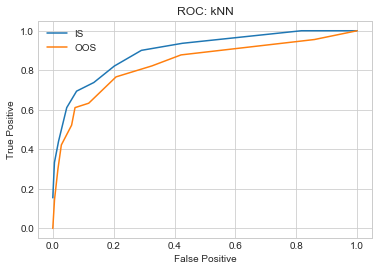

In [19]:
modelKNN = mdl.KNN(scale=True, n_neighbors=10, weights='uniform')
modelKNN.fit(data)
modelKNN.predict(dataT)
modelKNN.printPlotSummary()

###KNN CV

****** KNN CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.84 / 0.78 (0.03) / 0.80

accproba	 (IS / CV / OOS): 0.78 / 0.71 (0.03) / 0.74

logproba	 (IS / CV / OOS): -0.33 / -1.71 (0.72) / -1.49

aucproba	 (IS / CV / OOS): 0.92 / 0.82 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.78 / 0.66 (0.07) / 0.67

precision	 (IS / CV / OOS): 0.83 / 0.76 (0.06) / 0.72

-----Confusion (IS)-----

   0-pred  1-pred
0    0.53    0.07
1    0.09    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.58    0.09
1    0.11    0.22

-----Best CV Parameters-----

n_neighbors = 5.00

...with the score = 0.78   | avg = 0.78, std = 0.01

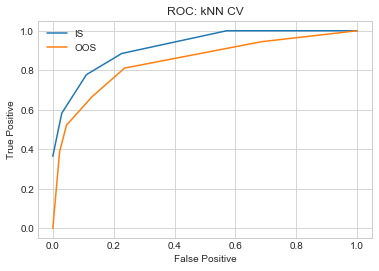

In [20]:
KNNCV = mdl.genModelCV(mdl.KNN, cv=5, grid={'n_neighbors': (5, 10, 20, 40)})
modelKNNCV = KNNCV(scale=True, weights='uniform')
modelKNNCV.fit(data)
modelKNNCV.predict(dataT)
modelKNNCV.printPlotSummary()

###Decision Trees

****** DECISION TREE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.82 / 0.80 (0.03) / 0.80

accproba	 (IS / CV / OOS): 0.74 / 0.72 (0.02) / 0.74

logproba	 (IS / CV / OOS): -0.40 / -0.72 (0.38) / -0.41

aucproba	 (IS / CV / OOS): 0.88 / 0.84 (0.02) / 0.86

recall	 (IS / CV / OOS): 0.86 / 0.81 (0.06) / 0.82

precision	 (IS / CV / OOS): 0.74 / 0.73 (0.05) / 0.67

-----Confusion (IS)-----

   0-pred  1-pred
0    0.48    0.12
1    0.06    0.35

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.14
1    0.06    0.28

-----Feature Importance-----

Pclass        0.09
Age           0.00
SibSp         0.06
Parch         0.00
Fare          0.07
EmbarkedC     0.00
EmbarkedS     0.00
Female        0.62
CabinNan      0.09
AgeNan        0.00
TitleMaster   0.07
TitleMiss     0.00
TitleRare     0.00
dtype: float64

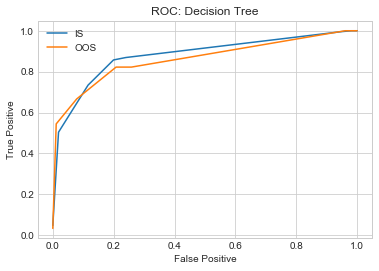

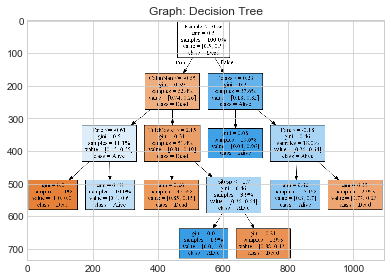

In [23]:
modelTree = mdl.Tree(scale=True, max_leaf_nodes=8, class_weight='balanced', random_state=1)
modelTree.fit(data)
modelTree.predict(dataT)
modelTree.printPlotSummary()

###Decision Trees CV

****** DECISION TREE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.84 / 0.80 (0.03) / 0.80

accproba	 (IS / CV / OOS): 0.76 / 0.72 (0.02) / 0.73

logproba	 (IS / CV / OOS): -0.38 / -0.72 (0.39) / -0.79

aucproba	 (IS / CV / OOS): 0.89 / 0.84 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.85 / 0.81 (0.06) / 0.79

precision	 (IS / CV / OOS): 0.77 / 0.73 (0.05) / 0.67

-----Confusion (IS)-----

   0-pred  1-pred
0    0.49    0.10
1    0.06    0.35

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.13
1    0.07    0.26

-----Feature Importance-----

Pclass        0.09
Age           0.02
SibSp         0.06
Parch         0.00
Fare          0.10
EmbarkedC     0.00
EmbarkedS     0.00
Female        0.58
CabinNan      0.09
AgeNan        0.00
TitleMaster   0.07
TitleMiss     0.00
TitleRare     0.00
dtype: float64

-----Best CV Parameters-----

max_leaf_nodes = 16.00

...with the score = 0.80   | avg = 0.79, std = 0.01

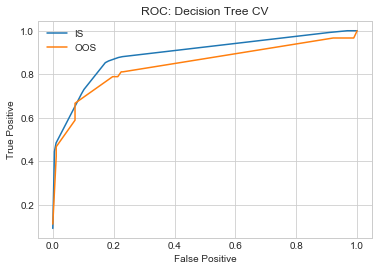

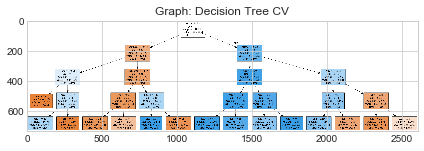

In [25]:
TreeCV = mdl.genModelCV(mdl.Tree, cv=5, grid={'max_leaf_nodes': (4, 8, 16)})
modelTreeCV = TreeCV(scale=True, class_weight='balanced', random_state=1)
modelTreeCV.fit(data)
modelTreeCV.predict(dataT)
modelTreeCV.printPlotSummary()

###Random Forests

In [72]:
modelRandomForest = mdl.RandomForest(scale=True, n_estimators=128, max_features=None,
                                     max_depth=None, max_leaf_nodes=16, class_weight='balanced', random_state=1)
modelRandomForest.fit(data)
modelRandomForest.predict(dataT)
modelRandomForest.printPlotSummary()


****** RANDOM FOREST ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.87 / 0.80 (0.04) / 0.85

accproba	 (IS / CV / OOS): 0.76 / 0.72 (0.02) / 0.75

logproba	 (IS / CV / OOS): -0.36 / -0.44 (0.06) / -0.39

aucproba	 (IS / CV / OOS): 0.92 / 0.86 (0.03) / 0.88

recall	 (IS / CV / OOS): 0.83 / 0.74 (0.05) / 0.79

precision	 (IS / CV / OOS): 0.83 / 0.74 (0.07) / 0.83

-----Confusion (IS)-----

   0-pred  1-pred
0    0.56    0.06
1    0.06    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.07
1    0.09    0.32

-----Feature Importance-----

Pclass      0.08
Age         0.15
SibSp       0.03
Parch       0.00
Fare        0.19
EmbarkedC   0.01
EmbarkedS   0.01
Female      0.53
dtype: float64

###Boosted Trees

In [73]:
modelBoostedTree = mdl.BoostedTree(scale=True, n_estimators=256, loss='deviance', learning_rate=0.1, subsample=1.,
                                   max_features=None, max_depth=2, max_leaf_nodes=None, random_state=1,
                                   balanceWeights=True)
modelBoostedTree.fit(data)
modelBoostedTree.predict(dataT)
modelBoostedTree.printPlotSummary(cv=5)
modelBoostedTree.plotPartialDependence(features=('Age', 'Fare', 'Pclass', 
                                                 ('Age','Fare'),('Age','Pclass'),('Fare','Pclass'),
                                                 ('Female', 'Age'), ('Female','Pclass'),('Female','Fare')))

****** BOOSTED TREE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.89 / 0.80 (0.04) / 0.84

accproba	 (IS / CV / OOS): 0.78 / 0.72 (0.02) / 0.75

logproba	 (IS / CV / OOS): -0.31 / -0.48 (0.07) / -0.40

aucproba	 (IS / CV / OOS): 0.95 / 0.85 (0.04) / 0.89

recall	 (IS / CV / OOS): 0.86 / 0.74 (0.05) / 0.80

precision	 (IS / CV / OOS): 0.85 / 0.73 (0.09) / 0.80

-----Confusion (IS)-----

   0-pred  1-pred
0    0.57    0.06
1    0.05    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.51    0.08
1    0.08    0.32

-----Feature Importance-----

Pclass      0.06
Age         0.39
SibSp       0.06
Parch       0.01
Fare        0.38
EmbarkedC   0.00
EmbarkedS   0.01
Female      0.08
dtype: float64

###Boosted Trees CV

In [9]:
BoostedTreeCV = mdl.genModelCV(ModelClass=mdl.BoostedTree, grid={'learning_rate': np.exp2(np.arange(-5, 1., 1))})
modelBoostedTreeCV = BoostedTreeCV(cv=5, scale=True, n_estimators=256, loss='deviance', learning_rate=0.1, subsample=1.,
                                   max_features=None, max_depth=2, max_leaf_nodes=None, random_state=1,
                                   balanceWeights=True)
modelBoostedTreeCV.fit(data)
modelBoostedTreeCV.predict(dataT)
modelBoostedTreeCV.printPlotSummary(cv=5)
modelBoostedTreeCV.plotPartialDependence(features=('Age', 'Fare', 'Pclass',
                                                   ('Age', 'Fare'), ('Age', 'Pclass'), ('Fare', 'Pclass'),
                                                   ('Female', 'Age'), ('Female', 'Pclass'), ('Female', 'Fare')))


****** BOOSTED TREE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.90 / 0.80 (0.04) / 0.82

accproba	 (IS / CV / OOS): 0.79 / 0.72 (0.03) / 0.75

logproba	 (IS / CV / OOS): -0.29 / -0.49 (0.08) / -0.42

aucproba	 (IS / CV / OOS): 0.95 / 0.85 (0.04) / 0.89

recall	 (IS / CV / OOS): 0.88 / 0.76 (0.06) / 0.83

precision	 (IS / CV / OOS): 0.86 / 0.71 (0.08) / 0.76

-----Confusion (IS)-----

   0-pred  1-pred
0    0.57    0.05
1    0.05    0.33

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.49    0.10
1    0.07    0.34

-----Feature Importance-----

Pclass      0.06
Age         0.37
Fare        0.43
EmbarkedC   0.01
EmbarkedS   0.01
Female      0.07
SibSpYes    0.02
ParchYes    0.02
dtype: float64

-----Best CV Parameters-----

learning_rate = 0.12

...with the score = 0.80   | avg = 0.79, std = 0.02

###Boosted Trees (XGBoost) - UNDER CONSTRUCTION

In [5]:
# modelBoostedTreeXG = mdl.BoostedTreeXGBoost(scale=True, n_estimators=128, loss='deviance', learning_rate=1.,
#                                             max_features=None, max_depth=2, max_leaf_nodes=None, random_state=1,
#                                             balanceWeights=True)
# modelBoostedTreeXG.fit(data)
# modelBoostedTreeXG.predict(dataT)
# modelBoostedTreeXG.printSummary()
# modelBoostedTreeXG.plotROC()


###SVM CV (Polynomial)

In [19]:
modelSVMCVPoly = mdl.SVMCV(cv=5, scale=True, kernel='poly', degree=4, class_weight='balanced', random_state=1)
modelSVMCVPoly.fit(data)
modelSVMCVPoly.predict(dataT)
modelSVMCVPoly.printPlotSummary()


*DEPRECIATED*  Use genModelCV instead

****** SVM CV (POLY): ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.86 / 0.78 (0.03) / 0.83

accproba	 (IS / CV / OOS): 0.69 / 0.64 (0.02) / 0.67

logproba	 (IS / CV / OOS): -0.42 / -0.58 (0.09) / -0.47

aucproba	 (IS / CV / OOS): 0.91 / 0.79 (0.04) / 0.87

recall	 (IS / CV / OOS): 0.77 / 0.65 (0.13) / 0.74

precision	 (IS / CV / OOS): 0.85 / 0.73 (0.07) / 0.82

-----Confusion (IS)-----

   0-pred  1-pred
0    0.57    0.05
1    0.09    0.29

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.07
1    0.10    0.30

-----Best CV Parameters-----

C = 0.25

gamma = 0.25

...with the score = 0.80

###SVM CV (Radial)

In [6]:
modelSVMCVPoly = mdl.SVMCV(cv=5, scale=True, kernel='rbf', class_weight='balanced', random_state=1)
modelSVMCVPoly.fit(data)
modelSVMCVPoly.predict(dataT)
modelSVMCVPoly.printPlotSummary()


*DEPRECIATED*  Use genModelCV instead

****** SVM CV (RBF): ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.82 / 0.80 (0.03) / 0.81

accproba	 (IS / CV / OOS): 0.66 / 0.64 (0.02) / 0.66

logproba	 (IS / CV / OOS): -0.46 / -0.50 (0.03) / -0.47

aucproba	 (IS / CV / OOS): 0.88 / 0.84 (0.04) / 0.87

recall	 (IS / CV / OOS): 0.74 / 0.72 (0.05) / 0.74

precision	 (IS / CV / OOS): 0.78 / 0.73 (0.07) / 0.78

-----Confusion (IS)-----

   0-pred  1-pred
0    0.55    0.08
1    0.10    0.28

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.51    0.09
1    0.10    0.30

-----Best CV Parameters-----

C = 4.00

gamma = 0.06

...with the score = 0.80

### Model Stacking Equal Weights

In [34]:
BaseKNNCV = mdl.genModelCV(mdl.KNN, grid={'n_neighbors': (5, 10, 20, 40)}, cv=5)\
    (scale=False, weights='uniform')
BaseBoostedTreeCV = mdl.genModelCV(ModelClass=mdl.BoostedTree, grid={'learning_rate': np.exp2(np.arange(-5, 1., 1))}, cv=5) \
    (scale=False, n_estimators=256, loss='deviance', learning_rate=0.1, subsample=1.,
     max_features=None, max_depth=2, max_leaf_nodes=None, random_state=1, balanceWeights=True)
ModelVote = mdl.Vote(scale=True, Models=(('KNN',BaseKNNCV), ('BosteedTree', BaseBoostedTreeCV)), voting='hard', weights=None,
                     baseClassifiersInfo=False)
ModelVote.fit(data)
ModelVote.predict(dataT)
ModelVote.printPlotSummary(cv=5)

****** VOTE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

<PROBABILITY IS NONE: SOME PERFORMANCE STATISTICS ARE NOT AVAILABLE>

-----Performance-----

accuracy	 (IS / CV / OOS): 0.85 / 0.79 (0.02) / 0.82

-----Confusion (IS)-----

   0-pred  1-pred
0    0.55    0.05
1    0.10    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.60    0.07
1    0.12    0.22

<PROBABILITY IS NONE: ROC PLOT IS NOT AVAILABLE>

### Model Stacking & Selection CV

In [9]:
BaseLR = mdl.Logistic(fit_intercept=False, scale=False, C=10)
BaseKNNCV = mdl.genModelCV(mdl.KNN, grid={'n_neighbors': [5, 10, 20]})(cv=5, scale=False, weights='uniform')
BaseBoostedTreeCV = mdl.genModelCV(ModelClass=mdl.BoostedTree,
                                   grid={'learning_rate': [0.12, 0.06], 'subsample': [1., 0.8],
                                         'max_leaf_nodes': [4, 8]}) \
    (cv=5, scale=False, n_estimators=256, loss='deviance',
     max_features=None, random_state=1, balanceWeights=True)
BaseRandomForestCV = mdl.genModelCV(ModelClass=mdl.RandomForest, grid={'max_leaf_nodes': [8, 16, 32]}) \
    (cv=5, scale=False, n_estimators=256, max_features=None,
     max_depth=None, max_leaf_nodes=None, class_weight='balanced', random_state=1)
BaseSVMCV = mdl.genModelCV(ModelClass=mdl.SVM, grid={'degree': [2, 4], 'gamma': [0.06, 0.12, 0.25]}) \
    (cv=5, scale=False, C=0.25, kernel='poly', class_weight='balanced', random_state=1)
BaseLinearLocalCV = mdl.genModelCV(ModelClass=mdl.LogisticLinearLocal, grid={'bw': [0.25, 0.5, 1., 2.]}) \
    (cv=5, scale=False, reg_type='ll')
# BaseGAMCV = mdl.genModelCV(ModelClass=mdl.LogisticGAM, grid={'lam': np.exp2(np.arange(-4, 5, 2))}) \
#     (cv=5, scale=False, fit_intercept=False, n_splines=15)
BaseModelsCV = (('Logistic', BaseLR), ('KNN CV', BaseKNNCV), ('BoostedTree CV', BaseBoostedTreeCV),
                ('RandomForest CV', BaseRandomForestCV), ('SVM CV', BaseSVMCV), ('LinearLocal CV', BaseLinearLocalCV))


In [11]:
# Model Selection CV
weightsGrid = utmdl.weightsGrid(n=len(BaseModelsCV), step=1)
ModelVoteCV = mdl.VoteCV(cv=5, scale=True,
                         Models=BaseModelsCV,
                         voting='soft', weightsGrid=weightsGrid, baseClassifiersInfo=False)
ModelVoteCV.fit(data)
ModelVoteCV.predict(dataT)
ModelVoteCV.printPlotSummary(cv=5)


****** VOTE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.91 / 0.81 (0.04) / 0.85

accproba	 (IS / CV / OOS): 0.81 / 0.66 (0.07) / 0.76

logproba	 (IS / CV / OOS): -0.25 / -0.49 (0.09) / -0.40

aucproba	 (IS / CV / OOS): 0.97 / 0.83 (0.05) / 0.89

recall	 (IS / CV / OOS): 0.89 / 0.70 (0.09) / 0.81

precision	 (IS / CV / OOS): 0.87 / 0.79 (0.09) / 0.83

-----Confusion (IS)-----

   0-pred  1-pred
0    0.58    0.05
1    0.04    0.33

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.07
1    0.08    0.33

-----Best CV Parameters-----

BoostedTree CV = 1.00

...with the score = 0.81   | avg = 0.79, std = 0.01

In [12]:
# Model Stacking CV
weightsGrid = utmdl.weightsGrid(n=len(BaseModelsCV), step=0.1)
ModelVoteCV = mdl.VoteCV(cv=5, scale=True, Models=BaseModelsCV,
                         voting='soft', weightsGrid=weightsGrid, baseClassifiersInfo=False)
ModelVoteCV.fit(data)
ModelVoteCV.predict(dataT)
ModelVoteCV.printPlotSummary(cv=5)

****** VOTE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.90 / 0.81 (0.02) / 0.84

accproba	 (IS / CV / OOS): 0.80 / 0.69 (0.02) / 0.76

logproba	 (IS / CV / OOS): -0.27 / -0.45 (0.04) / -0.41

aucproba	 (IS / CV / OOS): 0.97 / 0.86 (0.03) / 0.89

recall	 (IS / CV / OOS): 0.84 / 0.77 (0.06) / 0.78

precision	 (IS / CV / OOS): 0.89 / 0.74 (0.09) / 0.82

-----Confusion (IS)-----

   0-pred  1-pred
0    0.59    0.04
1    0.06    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.52    0.07
1    0.09    0.32

-----Best CV Parameters-----

-----Weights-----

KNN CV = 0.50

BoostedTree CV = 0.50

...with the score = 0.83   | avg = 0.81, std = 0.01

### Model Stacking CV with many base classifiers (slow)

In [25]:
# Model Stacking CV II
BaseModels = [['Logistic', mdl.Logistic(fit_intercept=False, scale=False, C=10)]]
for i, j in itertools.product([5, 10, 20], ['uniform']):
    BaseModels += [['KNN_{}_{}'.format(i, j), mdl.KNN(scale=False, n_neighbors=i, weights=j)]]
for i, j, k in itertools.product([0.12, 0.06], [1., 0.8], [4, 8]):
    BaseModels += [['BoostedTree_learn{}_sub{}_leaf{}'.format(i, j, k),
                    mdl.BoostedTree(scale=False, n_estimators=256, loss='deviance', learning_rate=i, subsample=j,
                                    max_features=None, max_depth=None, max_leaf_nodes=k, random_state=1,
                                    balanceWeights=True)]]
# for i in [8, 16, 32]:
#     BaseModels += [['RandomForest_leaf{}'.format(i),
#                     mdl.RandomForest(scale=False, n_estimators=256, max_features=None, max_depth=None,
#                                      max_leaf_nodes=i, class_weight='balanced', random_state=1)]]
# for i, j in itertools.product([2, 4], [0.06, 0.25]):
#     BaseModels += [['SVM_degree{}_gamma{}'.format(i, j),
#                     mdl.SVM(scale=False, C=0.25, kernel='poly', degree=i, gamma=j, class_weight='balanced',
#                             random_state=1)]]
# for i in [0.5, 1., 1.5,  2.5]:
#     BaseModels += [['LinearLocal_bw{}'.format(i),
#                     mdl.LogisticLinearLocal(scale=False, reg_type='ll', bw=i)]]
# for i in [2, 4, 8]:
#     BaseModels += [['LogisticGAM_lam{}'.format(i),
#                     mdl.LogisticGAM(scale=False, fit_intercept=False, n_splines=15, lam=i)]]
weightsGrid = utmdl.weightsGrid(n=len(BaseModels), step=0.2)
ModelVoteCV = mdl.VoteCV(cv=5, scale=True, Models=BaseModels, voting='soft', weightsGrid=weightsGrid)
ModelVoteCV.fit(data)
ModelVoteCV.predict(dataT)
ModelVoteCV.printPlotSummary(cv=5)


KeyboardInterrupt: 

### Model Stacking Regress

In [13]:
BaseModels = [['Logistic', mdl.Logistic(fit_intercept=False, scale=False, C=10)]]
for i, j in itertools.product([5, 10, 20], ['uniform']):
    BaseModels += [['KNN_{}_{}'.format(i, j), mdl.KNN(scale=False, n_neighbors=i, weights=j)]]
for i, j, k in itertools.product([0.12, 0.06], [1., 0.8], [4, 8]):
    BaseModels += [['BoostedTree_learn{}_sub{}_leaf{}'.format(i, j, k),
                    mdl.BoostedTree(scale=False, n_estimators=256, loss='deviance', learning_rate=i, subsample=j,
                                    max_features=None, max_depth=None, max_leaf_nodes=k, random_state=1,
                                    balanceWeights=True)]]
for i in [8, 16, 32]:
    BaseModels += [['RandomForest_leaf{}'.format(i),
                    mdl.RandomForest(scale=False, n_estimators=256, max_features=None, max_depth=None,
                                     max_leaf_nodes=i, class_weight='balanced', random_state=1)]]
for i, j in itertools.product([2, 4], [0.06, 0.12, 0.25]):
    BaseModels += [['SVM_degree{}_gamma{}'.format(i, j),
                    mdl.SVM(scale=False, C=0.25, kernel='poly', degree=i, gamma=j, class_weight='balanced',
                            random_state=1)]]
for i in [0.25, 0.5, 1., 2.]:
    BaseModels += [['LinearLocal_bw{}'.format(i),
                    mdl.LogisticLinearLocal(scale=False, reg_type='ll', bw=i)]]
# for i in [2, 4, 8]:
#     BaseModels += [['LogisticGAM_lam{}'.format(i),
#                     mdl.LogisticGAM(scale=False, fit_intercept=False, n_splines=15, lam=i)]]

In [14]:
# Model Stacking Regress (Square loss)
ModelVoteRegress = mdl.VoteRegress(cv=5, scale=True, Models=BaseModels, voting='soft', loss='square', 
                                   baseClassifiersInfo=False)
ModelVoteRegress.fit(data)
ModelVoteRegress.predict(dataT)
ModelVoteRegress.printPlotSummary(cv=5)

****** VOTE REGRESS ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.93 / 0.81 (0.03) / 0.85

accproba	 (IS / CV / OOS): 0.72 / 0.65 (0.01) / 0.69

logproba	 (IS / CV / OOS): -0.34 / -0.48 (0.03) / -0.42

aucproba	 (IS / CV / OOS): 0.98 / 0.87 (0.04) / 0.90

recall	 (IS / CV / OOS): 0.87 / 0.72 (0.06) / 0.76

precision	 (IS / CV / OOS): 0.93 / 0.77 (0.08) / 0.85

-----Confusion (IS)-----

   0-pred  1-pred
0    0.60    0.02
1    0.05    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.54    0.06
1    0.10    0.31

-----Weights-----

LinearLocal_bw2.0 = 0.34

BoostedTree_learn0.12_sub0.8_leaf8 = 0.34

RandomForest_leaf16 = 0.25

RandomForest_leaf8 = 0.13

SVM_degree4_gamma0.06 = 0.13

LinearLocal_bw1.0 = 0.09

LinearLocal_bw0.5 = 0.07

SVM_degree2_gamma0.25 = 0.01

In [15]:
# Model Stacking Regress (Deviance loss)
ModelVoteRegress = mdl.VoteRegress(cv=5, scale=True, Models=BaseModels, voting='soft', loss='deviance', baseClassifiersInfo=False)
ModelVoteRegress.fit(data)
ModelVoteRegress.predict(dataT)
ModelVoteRegress.printPlotSummary(cv=5)


****** VOTE REGRESS ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.37 / 0.41

-----Performance-----

accuracy	 (IS / CV / OOS): 0.93 / 0.81 (0.03) / 0.85

accproba	 (IS / CV / OOS): 0.80 / 0.71 (0.01) / 0.75

logproba	 (IS / CV / OOS): -0.25 / -0.44 (0.05) / -0.38

aucproba	 (IS / CV / OOS): 0.98 / 0.87 (0.04) / 0.89

recall	 (IS / CV / OOS): 0.88 / 0.75 (0.06) / 0.79

precision	 (IS / CV / OOS): 0.94 / 0.75 (0.07) / 0.84

-----Confusion (IS)-----

   0-pred  1-pred
0    0.60    0.02
1    0.04    0.33

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.06
1    0.09    0.32

-----Weights-----

BoostedTree_learn0.12_sub0.8_leaf8 = 0.39

RandomForest_leaf8 = 0.30

KNN_5_uniform = 0.11

RandomForest_leaf32 = 0.09

KNN_20_uniform = 0.06

SVM_degree4_gamma0.06 = 0.03

LinearLocal_bw0.5 = 0.03

BoostedTree_learn0.12_sub0.8_leaf4 = 0.00

BoostedTree_learn0.06_sub0.8_leaf4 = 0.00

BoostedTree_learn0.12_sub1.0_leaf4 = 0.00

BoostedTree_learn0.06_sub1.0_leaf4 = 0.00

BoostedTree_learn0.06_sub0.8_leaf8 = 0.00

BoostedTree_learn0.12_sub1.0_leaf8 = 0.00

SVM_degree4_gamma0.25 = 0.00

RandomForest_leaf16 = 0.00

BoostedTree_learn0.06_sub1.0_leaf8 = 0.00

SVM_degree2_gamma0.12 = 0.00

Logistic = 0.00

LinearLocal_bw2.0 = 0.00

KNN_10_uniform = 0.00

In [19]:
# Model Stacking Regress (Normalized deviance loss)
ModelVoteRegress = mdl.VoteRegress(cv=5, scale=True, Models=BaseModels, voting='soft', loss='devianceNormalized', baseClassifiersInfo=False)
ModelVoteRegress.fit(data)
ModelVoteRegress.predict(dataT)
ModelVoteRegress.printPlotSummary(cv=5)


KeyboardInterrupt: 